<a href="https://colab.research.google.com/github/yuukun123/Python/blob/master/Copy_of_Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

# T√πy ch·ªânh ƒë·ªÉ hi·ªÉn th·ªã bi·ªÉu ƒë·ªì ƒë·∫πp h∆°n
sns.set(style="whitegrid")

Mounted at /content/drive


In [3]:
df = pd.read_excel("/content/drive/MyDrive/dataset_osfstorage-archive/NormingData/Final_Cleaned_Database.xlsx")
print(df.to_string())

     Expression           Norming Survey  PainRating  FearRating  AngerRating  DisgustRating  HappinessRating  SadnessRating  SurpriseRating  ThreatRating  ConfusionRating      FearComp     AngerComp   DisgustComp  HappinessComp   SadnessComp  SurpriseComp    ThreatComp  ConfusionComp  Anger  Disgust  Fear       Sad  SmileClosed  SmileOpen  Surprise  BlinkLeft  BlinkRIght  BrowDownLeft  BrowDownRight  EpicanthicFold  EyeSquintLeft  EyeSquintRight   aah  B,M,P  big aah  ch,J,sh  D,S,T       F,V         K     N        oh  brow lowerer left  brow lowerer right   blink left  blink right  expression anger  expression baring teeth   expression disgust  expression fear  expression sad  expression smile right  expression smileclosed  expression smileopen  expression sneer  expression sneer left  expression surprise  modifier epicanthic fold  modifier eyesquint left  modifier eyesquint right  phoneme B,M,P  phoneme D,S,T  phoneme F,V  phoneme K  phoneme N  phoneme aah  phoneme big aah  phoneme 

In [4]:
# ƒê∆∞·ªùng d·∫´n file
file_path = "/content/drive/MyDrive/dataset_osfstorage-archive/NormingData/DelawarePainDatabase_SecondaryDatabase_FaceGenCharacterization.xlsx"
xls = pd.ExcelFile(file_path)

h√†m l·ªçc d·ªØ li·ªáu sheet ExpressionAverage


In [5]:
# def clean_expression_sheet(df, required_cols=["Expression"]):
#     # X√≥a c·ªôt kh√¥ng t√™n
#     df = df.loc[:, ~df.columns.str.contains("^Unnamed")]

#     # X√≥a d√≤ng thi·∫øu c·ªôt b·∫Øt bu·ªôc
#     df = df.dropna(subset=required_cols)

#     # Lo·∫°i b·ªè c√°c bi·ªÉu c·∫£m kh√¥ng d√πng
#     df = df[~df["Expression"].str.lower().str.contains("pms13")]
#     df = df[~df["Expression"].str.lower().str.contains("facegenpro_avgblackface")]

#     # C√°c c·ªôt c·∫ßn √©p ki·ªÉu v√† x·ª≠ l√Ω NaN
#     numeric_cols = ["ThreatRating", "ConfusionRating", "ThreatComp", "ConfusionComp"]
#     for col in numeric_cols:
#         if col in df.columns:
#             df[col] = df[col].replace([".", ""], np.nan)
#             df[col] = pd.to_numeric(df[col], errors="coerce")
#             df[col] = df[col].fillna(df[col].mean())

#     # Lo·∫°i b·ªè c√°c d√≤ng li√™n quan face gen pro
#     df = df[~df["Norming Survey"].str.lower().str.contains("facegenpro")]

#     df = df.infer_objects(copy=False)

#     return df


In [6]:
def clean_expression_sheet(df, required_cols=["Expression"]):
  # X√≥a c·ªôt kh√¥ng t√™n
  df = df.loc[:, ~df.columns.str.contains("^Unnamed")]

  # X√≥a d√≤ng thi·∫øu c·ªôt b·∫Øt bu·ªôc
  df = df.dropna(subset=required_cols)

  # Lo·∫°i b·ªè c√°c bi·ªÉu c·∫£m kh√¥ng d√πng
  df = df[~df["Expression"].str.lower().str.contains("pms13")]
  df = df[~df["Expression"].str.lower().str.contains("facegenpro_avgblackface")]

  # ‚úÖ Lo·∫°i b·ªè c√°c d√≤ng li√™n quan face gen pro TR∆Ø·ªöC ƒë·ªÉ kh√¥ng ·∫£nh h∆∞·ªüng ƒë·∫øn mean
  df = df[~df["Norming Survey"].str.lower().str.contains("facegenpro")]

  # C√°c c·ªôt c·∫ßn √©p ki·ªÉu v√† x·ª≠ l√Ω NaN
  numeric_cols = ["ThreatRating", "ConfusionRating", "ThreatComp", "ConfusionComp"]
  for col in numeric_cols:
      if col in df.columns:
          df[col] = df[col].replace([".", ""], np.nan)
          df[col] = pd.to_numeric(df[col], errors="coerce")
          df[col] = df[col].fillna(df[col].mean())

  df = df.loc[:, ~df.columns.str.contains("ConfusionRating")]
  df = df.loc[:, ~df.columns.str.contains("ConfusionComp")]

  df = df.infer_objects(copy=False)
  return df


ExpressionAverages

In [7]:
df_expr = pd.read_excel(xls, sheet_name="ExpressionAverages")
# print(df_expr.dtypes)
df_expr = clean_expression_sheet(df_expr)

print(df_expr.to_string())

   Expression Norming Survey  PainRating  FearRating  AngerRating  DisgustRating  HappinessRating  SadnessRating  SurpriseRating  ThreatRating      FearComp     AngerComp   DisgustComp  HappinessComp   SadnessComp  SurpriseComp    ThreatComp
0         AJ2      FirstPass    5.052632    2.894737     2.078947       2.421053         1.210526       3.131579        2.131579      1.736842  2.033766e-06  9.570970e-08  3.064130e-07   1.954638e-12  1.372440e-04  6.551333e-07  3.610371e-09
3         AK5      FirstPass    4.650000    2.225000     2.725000       2.575000         1.275000       2.275000        1.725000      2.375000  7.102722e-09  4.114614e-05  2.849266e-06   6.427339e-13  3.038153e-08  1.352565e-10  1.223136e-07
6         EF5      FirstPass    5.837838    2.594595     4.378378       3.162162         1.324324       1.864865        2.378378      3.351351  1.203900e-09  3.054509e-03  2.977539e-07   2.203910e-15  3.098174e-13  5.076302e-11  6.699533e-06
9         KM4      FirstPass    

<ipython-input-6-63b2d55437d4>:19: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace([".", ""], np.nan)


h√†m l·ªçc d·ªØ li·ªáu sheet slider_face_gen

In [8]:
def clean_slider_facegen_sheet(df):

  # X√≥a c√°c c·ªôt kh√¥ng t√™n (th∆∞·ªùng l√† ch√∫ th√≠ch ho·∫∑c r·ªóng)
  df = df.loc[:, ~df.columns.str.contains("^Unnamed")]

  # Lo·∫°i b·ªè c·ªôt 'PMS13' n·∫øu c√≥ (theo khuy·∫øn ngh·ªã)
  if "PMS13" in df.columns:
      df = df.drop(columns=["PMS13"])

  # Duy·ªát qua t·∫•t c·∫£ c√°c c·ªôt tr·ª´ 'Slider'
  numeric_cols = df.columns.drop("Slider")
  for col in numeric_cols:
      # Thay "." v√† chu·ªói r·ªóng th√†nh NaN
      df[col] = df[col].replace([".", ""], np.nan)

      # √âp ki·ªÉu th√†nh s·ªë (sai s·∫Ω th√†nh NaN)
      df[col] = pd.to_numeric(df[col], errors="coerce")

      # ƒêi·ªÅn thi·∫øu b·∫±ng trung b√¨nh c·ªôt
      df[col] = df[col].fillna(df[col].mean())

  # B·ªè c·∫£nh b√°o downcasting
  df = df.infer_objects(copy=False)

  return df


Slider_face_gen

In [9]:
df_slider_mo = pd.read_excel(xls, sheet_name="Sliders_FaceGenModeller")
# print(df_slider_mo.dtypes)
df_slider_mo = clean_slider_facegen_sheet(df_slider_mo)
print(df_slider_mo.to_string())

            Slider       AK5    AJ2     EF5      KM4   KM4b      PMS5      PMS7    PMS14      PMS2  PMS8
0            Anger  0.220000  0.438  0.8400  0.87375  0.849  0.950000  0.070000  0.75000  0.350000  0.15
1          Disgust  0.480000  0.210  0.8700  0.77000  0.770  0.595714  1.000000  0.39000  0.750000  1.00
2             Fear  0.551818  1.000  0.5125  0.87375  0.849  0.595714  0.811111  0.69125  0.530909  0.47
3              Sad  0.830000  1.000  1.0000  1.00000  1.000  1.000000  1.000000  1.00000  1.000000  1.00
4      SmileClosed  0.551818  0.438  0.4600  1.00000  1.000  0.700000  1.000000  0.69125  1.000000  1.00
5        SmileOpen  0.551818  0.800  0.1300  0.87375  0.500  0.140000  0.230000  0.13000  0.530909  0.47
6         Surprise  0.551818  0.438  0.5125  0.87375  0.849  0.595714  0.811111  0.69125  0.400000  0.20
7        BlinkLeft  0.560000  0.150  0.5125  0.87375  0.849  0.200000  0.811111  0.69125  0.300000  0.13
8       BlinkRIght  0.570000  0.140  0.5125  0.87375  0

<ipython-input-8-57b868a77ba0>:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace([".", ""], np.nan)


h√†m l·ªçc first_pass_norming

In [10]:
# def clean_first_pass_norming(df):
#     import pandas as pd


#     # 1. Lo·∫°i c·ªôt ch·ª©a 'pms13'
#     df = df.loc[:, ~df.columns.str.contains("pms13", case=False)]

#     # 2. Lo·∫°i b·ªè c√°c c·ªôt nh√¢n kh·∫©u h·ªçc kh√¥ng c·∫ßn thi·∫øt
#     drop_cols = ['Race', 'SexualOrient', 'Political']
#     df = df.drop(columns=[col for col in drop_cols if col in df.columns], errors='ignore')

#     # 3. T√¨m c√°c c·ªôt ƒë√°nh gi√° c·∫£m x√∫c
#     rating_cols = [c for c in df.columns if "emotion" in c.lower()]

#     # 4. T√≠nh t·ª∑ l·ªá thi·∫øu
#     miss_ratios = df[rating_cols].isna().mean()

#     # 5. Gi·ªØ l·∫°i c√°c c·ªôt c√≥ missing <= 0.4
#     keep_cols = miss_ratios[miss_ratios <= 0.4].index.tolist()
#     df = df[keep_cols + [col for col in df.columns if col not in rating_cols]]

#     # 6. Ph√¢n lo·∫°i c·ªôt theo m·ª©c ƒë·ªô thi·∫øu
#     small_missing = miss_ratios[miss_ratios < 0.05].index.tolist()
#     large_missing = miss_ratios[(miss_ratios >= 0.05) & (miss_ratios <= 0.4)].index.tolist()

#     # 7. Drop d√≤ng ch·ª©a missing < 5%
#     df = df.dropna(subset=small_missing)

#     # 8. ƒêi·ªÅn missing >= 5% b·∫±ng mode
#     for col in large_missing:
#         mode_val = df[col].mode().iat[0]
#         df[col] = df[col].fillna(mode_val).astype(int)

#     # 9. Reshape wide ‚Üí long format
#     id_vars = ['ResponseId', 'Age', 'Gender']
#     id_vars = [col for col in id_vars if col in df.columns]

#     long_df = df.melt(
#         id_vars=id_vars,
#         value_vars=keep_cols,
#         var_name="Item",
#         value_name="Rating"
#     )

#     # 10. T√°ch th√¥ng tin t·ª´ t√™n c·ªôt: ImageID, EmotionType, QuestionNumber
#     long_df[['ImageID', 'EmotionType', 'QuestionNum']] = long_df['Item'].str.extract(r'([A-Za-z0-9_]+)_([a-zA-Z0-9]+)_([0-9]+)')

#     # 11. X·ª≠ l√Ω ki·ªÉu d·ªØ li·ªáu
#     long_df['Rating'] = pd.to_numeric(long_df['Rating'], errors='coerce')
#     long_df['QuestionNum'] = pd.to_numeric(long_df['QuestionNum'], errors='coerce')

#     return long_df


In [11]:
# def clean_first_pass_norming(df):
#     # 1. Lo·∫°i b·ªè c√°c c·ªôt ch·ª©a 'pms13'
#     df = df.loc[:, ~df.columns.str.contains("pms13", case=False)]

#     # 2. B·ªè d√≤ng ƒë·∫ßu ti√™n (header m√¥ t·∫£)
#     df = df.drop(index=0).reset_index(drop=True)

#     # 3. T√¨m c√°c c·ªôt c·∫£m x√∫c
#     emotion_cols = [col for col in df.columns if "_emotion_" in col]

#     # 4. Chu·∫©n b·ªã metadata: Age, Gender
#     df_meta = df[['ResponseId', 'Age', 'Gender']].copy()

#     df_meta['Age'] = pd.to_numeric(df_meta['Age'], errors='coerce')
#     df_meta['Gender'] = df_meta['Gender'].str.strip().str.lower()

#     # ‚úÖ Chu·∫©n h√≥a Gender: female = 0, male = 1
#     gender_map = {'female': 0, 'male': 1}
#     df_meta['Gender'] = df_meta['Gender'].map(gender_map)

#     # ‚úÖ X√≥a c√°c d√≤ng Gender kh√¥ng h·ª£p l·ªá (NaN)
#     df_meta = df_meta.dropna(subset=['Gender'])

#     # 5. Chuy·ªÉn v·ªÅ d·∫°ng long format
#     df_long = df.melt(id_vars=['ResponseId'], value_vars=emotion_cols,
#                       var_name='Image_ID', value_name='Emotion')

#     # 6. B·ªè c√°c d√≤ng kh√¥ng c√≥ nh√£n
#     df_long.dropna(subset=['Emotion'], inplace=True)

#     # 7. Tr√≠ch t√™n file ·∫£nh t·ª´ t√™n c·ªôt
#     df_long['ExpressionKey'] = df_long['Image_ID'].str.extract(r'([A-Za-z0-9]+)_emotion_\d+')[0]
#     df_long['ImageFile'] = df_long['ExpressionKey'] + ".jpg"

#     # ‚úÖ 7.5. L·ªçc c√°c ·∫£nh c√≥ ExpressionKey h·ª£p l·ªá
#     valid_expressions = ["AJ2", "AK5", "EF5", "KM4", "KM4b", "PMS5", "PMS7", "PMS14"]
#     df_long = df_long[df_long['ExpressionKey'].isin(valid_expressions)]

#     # 8. ƒê·ªïi ki·ªÉu nh√£n c·∫£m x√∫c sang s·ªë
#     df_long['Emotion'] = df_long['Emotion'].astype(int)

#     # 9. Merge th√™m Age v√† Gender
#     df_long = df_long.merge(df_meta, on='ResponseId', how='inner')

#     return df_long


In [12]:
def clean_first_pass_norming(df):
    # 1. Lo·∫°i b·ªè c√°c c·ªôt ch·ª©a 'pms13'
    df = df.loc[:, ~df.columns.str.contains("pms13", case=False)]

    # 2. B·ªè d√≤ng ƒë·∫ßu ti√™n (header m√¥ t·∫£)
    df = df.drop(index=0).reset_index(drop=True)

    # 3. T√¨m c√°c c·ªôt c·∫£m x√∫c
    emotion_cols = [col for col in df.columns if "_emotion_" in col]

    # 4. Chu·∫©n b·ªã metadata: Age, Gender
    df_meta = df[['ResponseId', 'Age', 'Gender']].copy()

    df_meta['Age'] = pd.to_numeric(df_meta['Age'], errors='coerce')
    df_meta['Gender'] = df_meta['Gender'].str.strip().str.lower()

    # ‚úÖ Chu·∫©n h√≥a Gender: female = 0, male = 1
    gender_map = {'female': 0, 'male': 1}
    df_meta['Gender'] = df_meta['Gender'].map(gender_map)

    # ‚úÖ X√≥a c√°c d√≤ng Gender kh√¥ng h·ª£p l·ªá (NaN)
    df_meta = df_meta.dropna(subset=['Gender'])

    # 5. Chuy·ªÉn v·ªÅ d·∫°ng long format
    df_long = df.melt(id_vars=['ResponseId'], value_vars=emotion_cols,
                      var_name='Image_ID', value_name='Emotion')

    # 6. B·ªè c√°c d√≤ng kh√¥ng c√≥ nh√£n
    df_long.dropna(subset=['Emotion'], inplace=True)

    # 7. Tr√≠ch t√™n file ·∫£nh t·ª´ t√™n c·ªôt
    # V√≠ d·ª• t√™n ·∫£nh: AF1_AJ2.jpg
    # df_long['ExpressionKey'] = df_long['Image_ID'].str.extract(r'_[A-Z]*([A-Za-z0-9]+)_emotion_\d+')[0]

    df_long['ExpressionKey'] = df_long['Image_ID'].str.extract(r'([A-Za-z0-9]+)_emotion_\d+')[0]
    df_long['ImageFile'] = df_long['ExpressionKey'] + ".jpg"

    # ‚úÖ 7.5. L·ªçc c√°c ·∫£nh c√≥ ExpressionKey h·ª£p l·ªá
    valid_expressions = ["AJ2", "AK5", "EF5", "KM4", "KM4b", "PMS5", "PMS7", "PMS14"]
    df_long = df_long[df_long['ExpressionKey'].isin(valid_expressions)]

    # 8. ƒê·ªïi ki·ªÉu nh√£n c·∫£m x√∫c sang s·ªë
    df_long['Emotion'] = df_long['Emotion'].astype(int)

    # 9. Merge th√™m Age v√† Gender
    df_long = df_long.merge(df_meta, on='ResponseId', how='inner')

    return df_long


Fist_pass_norming

In [13]:
df_first = pd.read_excel(xls, sheet_name="FirstPassNorming")
df_first = clean_first_pass_norming(df_first)


print(df_first.to_string())
# df_first.info()
# df_first.head()


             ResponseId          Image_ID  Emotion ExpressionKey  ImageFile  Age  Gender
0     R_2zw5psM5CtFQKno    EF5_emotion_18        4           EF5    EF5.jpg   26     1.0
1     R_2Ua2Dc353v4cNGn    EF5_emotion_18        2           EF5    EF5.jpg   32     0.0
2     R_2YR34dGGiKYFi2y    EF5_emotion_18        7           EF5    EF5.jpg   64     0.0
3     R_BWYpKelNH9C8aRj    EF5_emotion_18        1           EF5    EF5.jpg   24     1.0
4     R_2an0MfrT5MWzwiQ    EF5_emotion_18        7           EF5    EF5.jpg   45     0.0
5     R_3PGE13wEeq6tIOT    EF5_emotion_18        1           EF5    EF5.jpg   21     1.0
6     R_1lzUZmKRQVzOpxD    EF5_emotion_18        6           EF5    EF5.jpg   39     1.0
7     R_31uzrii0srEgLi3    EF5_emotion_18        1           EF5    EF5.jpg   59     0.0
8     R_27U5GunQGBeN6FX    EF5_emotion_18        1           EF5    EF5.jpg   31     0.0
9     R_3oYotaD13IZxRGi    EF5_emotion_18        1           EF5    EF5.jpg   25     1.0
10    R_2B4ImrFXFEt8L

h√†m l·ªçc demographics

In [14]:
def clean_demographics(df):
    # 0. Gi·ªØ l·∫°i hai c·ªôt ƒë·∫ßu ti√™n (gi·∫£ s·ª≠ l√† c·ªôt ch·ª©a Age v√† Gender)
    df = df.iloc[:, :2]

    # 1. ƒê·∫∑t t√™n c·ªôt
    df.columns = ['Age', 'Gender']  # ƒê·∫∑t t√™n c·ªôt l√† "Age" v√† "Gender"

    # 2. X√≥a d√≤ng ƒë·∫ßu ti√™n (Age, Gender)
    df = df.drop(index=0).reset_index(drop=True)

    # 3. Chu·∫©n h√≥a c·ªôt Gender: Female -> 0, Male -> 1, c√°c gi√° tr·ªã kh√°c -> NaN
    df['Gender'] = df['Gender'].astype(str).str.strip().str.lower()
    gender_map = {'female': 0, 'male': 1}
    df['Gender'] = df['Gender'].map(gender_map).where(df['Gender'].isin(['female', 'male']), np.nan)

    return df

Demographics

In [15]:
df_demographics = pd.read_excel(xls, sheet_name="Demographics")
df_demographics = clean_demographics(df_demographics)
print(df_demographics.to_string())


   Age  Gender
0   25       0
1   26       1
2   49       0
3   32       0
4   64       0
5   36       0
6   49       1
7   32       0
8   25       1
9   24       1
10  45       0
11  32       0
12  21       1
13  39       1
14  59       0
15  31       0
16  39       1
17  31       1
18  39       1
19  48       0
20  25       1
21  40       0
22  24       1
23  40       0
24  27       1
25  36       1
26  26       0
27  35       1
28  36       1
29  26       1
30  37       1
31  61       1
32  48       1
33  31       0
34  36       0
35  33       0
36  21       0
37  46       1
38  46       1
39  40       1
40  28       0
41  44       1
42  51       0
43  45       0
44  49       0
45  31       1
46  36       1
47  20       0
48  43       1
49  23       1
50  44       0
51  43       0
52  52       0
53  34       1
54  75       1
55  40       0
56  39       0
57  40       0
58  61       0
59  27       0
60  49       1
61  40       0
62  29       0
63  29       1
64  25       1
65  35    

In [16]:
# Gi·∫£ s·ª≠ 4 DataFrame ƒë√£ t·ªìn t·∫°i: df_expr, df_slider_mo, df_first, df_demographics

# Ghi v√†o file Excel v·ªõi 4 sheet
with pd.ExcelWriter('/content/drive/MyDrive/dataset_osfstorage-archive/NormingData/output_cleaned.xlsx') as writer:
    df_expr.to_excel(writer, sheet_name='Expression', index=False)
    df_slider_mo.to_excel(writer, sheet_name='Slider_MO', index=False)
    df_first.to_excel(writer, sheet_name='First', index=False)
    df_demographics.to_excel(writer, sheet_name='Demographics', index=False)

print("save successful")


save successful


In [17]:
# # ƒê∆∞·ªùng d·∫´n th∆∞ m·ª•c l∆∞u file CSV
# output_dir = '/content/drive/MyDrive/dataset_osfstorage-archive/NormingData/'

# # L∆∞u t·ª´ng DataFrame v√†o file CSV ri√™ng
# df_expr.to_csv(output_dir + 'Expression.csv', index=False)
# df_slider_mo.to_csv(output_dir + 'Slider_MO.csv', index=False)
# df_first.to_csv(output_dir + 'First.csv', index=False)
# df_demographics.to_csv(output_dir + 'Demographics.csv', index=False)

In [18]:
# # ƒê∆∞·ªùng d·∫´n t·ªõi file Excel nhi·ªÅu sheet
# xlsx_path = "/content/drive/MyDrive/dataset_osfstorage-archive/NormingData/output_cleaned.xlsx"  # ho·∫∑c ƒë∆∞·ªùng d·∫´n ƒë·∫ßy ƒë·ªß n·∫øu c·∫ßn

# # ƒê·ªçc t·∫•t c·∫£ c√°c sheet v√†o dict
# all_sheets = pd.read_excel(xlsx_path, sheet_name=None)

# # G·ªôp t·∫•t c·∫£ sheet l·∫°i th√†nh m·ªôt DataFrame
# merged_df = pd.concat(all_sheets.values(), ignore_index=True)

# # L∆∞u ra Excel
# merged_df.to_excel("/content/drive/MyDrive/dataset_osfstorage-archive/NormingData/merged_cleaned.xlsx", index=False)

# # L∆∞u ra CSV
# merged_df.to_csv("/content/drive/MyDrive/dataset_osfstorage-archive/NormingData/merged_cleaned.csv", index=False)

In [19]:
# import pandas as pd

# # ƒê·ªçc file Excel
# file_path = "/content/drive/MyDrive/dataset_osfstorage-archive/NormingData/output_cleaned.xlsx"
# xls = pd.ExcelFile(file_path)

# # ƒê·ªçc c√°c sheet
# df_expression = xls.parse("Expression")
# df_slider = xls.parse("Slider_MO")
# df_first = xls.parse("First")
# df_demo = xls.parse("Demographics")

# # --- B∆∞·ªõc 1: Transpose Slider_MO ƒë·ªÉ ph√π h·ª£p v·ªõi Expression ---
# df_slider_t = df_slider.set_index('Slider').T.reset_index()
# df_slider_t = df_slider_t.rename(columns={'index': 'Expression'})

# # Merge v·ªõi Expression theo c·ªôt "Expression"
# df_merged_exp = pd.merge(df_expression, df_slider_t, on="Expression", how="left")

# # --- B∆∞·ªõc 2: G·ªôp Demographics v√†o First (gi·∫£ ƒë·ªãnh th·ª© t·ª± d√≤ng gi·ªëng nhau) ---
# df_first_demo = pd.concat([df_first.reset_index(drop=True), df_demo.reset_index(drop=True)], axis=1)

# # --- B∆∞·ªõc 3: Chu·∫©n h√≥a m√£ ·∫£nh t·ª´ ImageFile ƒë·ªÉ merge ---
# df_first_demo['ImageCode'] = df_first_demo['ImageFile'].str.extract(r'([A-Z]+\d+[a-zA-Z]?)')

# # Merge First + Demographics v·ªõi d·ªØ li·ªáu bi·ªÉu c·∫£m
# df_final = pd.merge(df_first_demo, df_merged_exp, left_on='ImageCode', right_on='Expression', how='left')

# # Xu·∫•t ho·∫∑c l∆∞u file n·∫øu c·∫ßn:
# # df_final.to_excel("merged_output.xlsx", index=False)

# # Hi·ªÉn th·ªã m·ªôt v√†i d√≤ng ƒë·ªÉ ki·ªÉm tra
# print(df_final.head())


In [31]:
import pandas as pd

# ƒê∆∞·ªùng d·∫´n t·ªõi file Excel
file_path = "/content/drive/MyDrive/dataset_osfstorage-archive/NormingData/output_cleaned.xlsx"
xls = pd.ExcelFile(file_path)

# ƒê·ªçc c√°c sheet c·∫ßn thi·∫øt
df_first = pd.read_excel(xls, sheet_name="First")
df_expression = pd.read_excel(xls, sheet_name="Expression")

# L√†m s·∫°ch key b√™n First
df_first['ExpressionKey'] = df_first['ImageFile'].str.replace('.jpg', '', regex=False)
df_first['ExpressionKey'] = df_first['ExpressionKey'].str.strip().str.upper()

# L√†m s·∫°ch key b√™n Expression
df_expression['Expression'] = df_expression['Expression'].astype(str).str.strip().str.upper()

# Merge l·∫°i theo ExpressionKey
df_merged = df_first.merge(df_expression, left_on='ExpressionKey', right_on='Expression', how='left')

# Gi·ªØ l·∫°i c√°c c·ªôt mong mu·ªën
cols_to_keep = [
    'ImageFile', 'Emotion',  # t·ª´ First
    'PainRating', 'FearRating', 'AngerRating', 'DisgustRating', 'HappinessRating',
    'SadnessRating', 'SurpriseRating', 'ThreatRating',
    'FearComp', 'AngerComp', 'DisgustComp', 'HappinessComp',
    'SadnessComp', 'SurpriseComp', 'ThreatComp'
]

df_final = df_merged[cols_to_keep].dropna(subset=['PainRating'])  # l·ªçc c√°c d√≤ng kh√¥ng c√≥ PainRating

# In th·ª≠ k·∫øt qu·∫£
print(df_final.head())

# N·∫øu mu·ªën l∆∞u l·∫°i:
df_final.to_csv("/content/drive/MyDrive/dataset_osfstorage-archive/NormingData/pain_labels.csv", index=False)


  ImageFile  Emotion  PainRating  FearRating  AngerRating  DisgustRating  \
0   EF5.jpg        4    5.837838    2.594595     4.378378       3.162162   
1   EF5.jpg        2    5.837838    2.594595     4.378378       3.162162   
2   EF5.jpg        7    5.837838    2.594595     4.378378       3.162162   
3   EF5.jpg        1    5.837838    2.594595     4.378378       3.162162   
4   EF5.jpg        7    5.837838    2.594595     4.378378       3.162162   

   HappinessRating  SadnessRating  SurpriseRating  ThreatRating      FearComp  \
0         1.324324       1.864865        2.378378      3.351351  1.203900e-09   
1         1.324324       1.864865        2.378378      3.351351  1.203900e-09   
2         1.324324       1.864865        2.378378      3.351351  1.203900e-09   
3         1.324324       1.864865        2.378378      3.351351  1.203900e-09   
4         1.324324       1.864865        2.378378      3.351351  1.203900e-09   

   AngerComp   DisgustComp  HappinessComp   SadnessComp 

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/dataset_osfstorage-archive/NormingData/pain_labels.csv")
print(df.to_string())



T·ªïng ·∫£nh h·ª£p l·ªá: 128
Epoch 1/10
6/6 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 400ms/step - loss: 49.7089 - mae: 6.0309 - val_loss: 22.9231 - val_mae: 4.7810
Epoch 2/10
6/6 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 358ms/step - loss: 19.1584 - mae: 4.3052 - val_loss: 0.5003 - val_mae: 0.6674
Epoch 3/10
6/6 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 358ms/step - loss: 2.0349 - mae: 1.1936 - val_loss: 1.1449 - val_mae: 1.0417
Epoch 4/10
6/6 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 600ms/step - loss: 1.4510 - mae: 0.9889 - val_loss: 0.0591 - val_mae: 0.1831
Epoch 5/10
6/6 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 360ms/step - loss: 1.1963 - mae: 0.8698 - val_loss: 0.2707 - val_mae: 0.4866
Epoch 6/10
6/6 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 348ms/step - loss: 1.0714 - mae: 0.8159 - val_loss: 0.2218 - val_mae: 0.4036
Epoch 7/10
6/6 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î

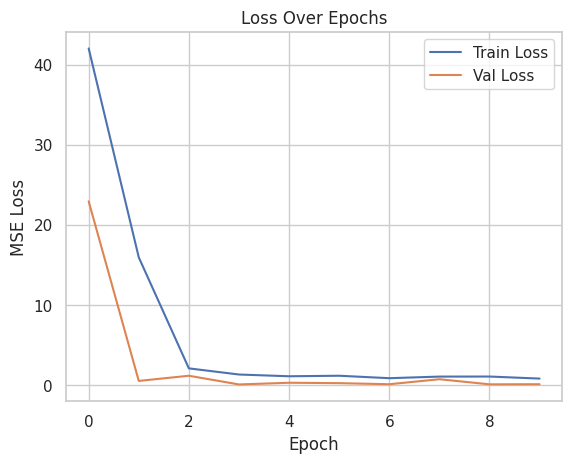

In [53]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Concatenate

# üëâ B∆Ø·ªöC 1: ƒê∆Ø·ªúNG D·∫™N
IMAGE_DIR = "/content/drive/MyDrive/dataset_osfstorage-archive/Stimuli/FaceGen/Modeller"
CSV_PATH = "/content/drive/MyDrive/dataset_osfstorage-archive/NormingData/pain_labels.csv"  # ch·ª©a c√°c c·ªôt c·∫£m x√∫c

# üëâ B∆Ø·ªöC 2: ƒê·ªåC LABEL
emotion_features = ['FearRating', 'AngerRating', 'DisgustRating', 'HappinessRating',
                    'SadnessRating', 'SurpriseRating', 'ThreatRating',
                    'FearComp', 'AngerComp', 'DisgustComp', 'HappinessComp',
                    'SadnessComp', 'SurpriseComp', 'ThreatComp']

cols_to_use = ['ImageFile', 'PainRating'] + emotion_features

df = pd.read_csv(CSV_PATH)
df = df[cols_to_use].dropna()

# üëâ B∆Ø·ªöC 3: LOAD ·∫¢NH & T√çCH H·ª¢P FEATURES
X_img, X_meta, y = [], [], []

for root, dirs, files in os.walk(IMAGE_DIR):
    for file in files:
        if file.endswith('.jpg') or file.endswith('.png'):
            img_path = os.path.join(root, file)
            if "_" in file:
                image_file_part = file.split("_")[-1]  # v√≠ d·ª• EF5.jpg

                label_row = df[df['ImageFile'] == image_file_part]
                if not label_row.empty:
                    try:
                        img = load_img(img_path, target_size=(128, 128))
                        img_array = img_to_array(img) / 255.0

                        meta_row = label_row[emotion_features].values[0]

                        X_img.append(img_array)
                        X_meta.append(meta_row)
                        y.append(label_row['PainRating'].values[0])
                    except Exception as e:
                        print(f"L·ªói x·ª≠ l√Ω ·∫£nh {file}: {e}")

X_img = np.array(X_img)
X_meta = np.array(X_meta)
y = np.array(y)

print("T·ªïng ·∫£nh h·ª£p l·ªá:", len(X_img))

# üëâ B∆Ø·ªöC 4: CHIA D·ªÆ LI·ªÜU
X_img_train, X_img_temp, X_meta_train, X_meta_temp, y_train, y_temp = train_test_split(
    X_img, X_meta, y, test_size=0.3, random_state=42)

X_img_val, X_img_test, X_meta_val, X_meta_test, y_val, y_test = train_test_split(
    X_img_temp, X_meta_temp, y_temp, test_size=0.5, random_state=42)

# üëâ B∆Ø·ªöC 5: M√î H√åNH MULTIMODAL
# Nh√°nh ·∫£nh
img_input = Input(shape=(128, 128, 3))
x = Conv2D(32, (3,3), activation='relu')(img_input)
x = MaxPooling2D((2,2))(x)
x = Conv2D(64, (3,3), activation='relu')(x)
x = MaxPooling2D((2,2))(x)
x = Flatten()(x)

# Nh√°nh c·∫£m x√∫c (metadata)
meta_input = Input(shape=(len(emotion_features),))
m = Dense(32, activation='relu')(meta_input)

# K·∫øt h·ª£p 2 nh√°nh
combined = Concatenate()([x, m])
z = Dense(128, activation='relu')(combined)
z = Dropout(0.3)(z)
output = Dense(1)(z)

model = Model(inputs=[img_input, meta_input], outputs=output)
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# üëâ B∆Ø·ªöC 6: TRAIN
history = model.fit(
    [X_img_train, X_meta_train], y_train,
    validation_data=([X_img_val, X_meta_val], y_val),
    epochs=10,
    batch_size=16
)

# üëâ B∆Ø·ªöC 7: ƒê√ÅNH GI√Å
loss, mae = model.evaluate([X_img_test, X_meta_test], y_test)
print(f"\nüéØ Test MAE: {mae:.2f}")

# üëâ B∆Ø·ªöC 8: V·∫º LOSS
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.show()


In [67]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# ƒê∆∞·ªùng d·∫´n test
test_image_path = "/content/drive/MyDrive/dataset_osfstorage-archive/Stimuli/FaceGen/Modeller/BM3/BM3_PMS5.jpg"
test_image_file = "EF5.jpg"  # So s√°nh v·ªõi c·ªôt ImageFile

# üëâ T√¨m h√†ng t∆∞∆°ng ·ª©ng trong DataFrame g·ªëc
row = df[df["ImageFile"] == test_image_file]
if row.empty:
    print("‚ùå Kh√¥ng t√¨m th·∫•y ƒë·∫∑c tr∆∞ng c·∫£m x√∫c t∆∞∆°ng ·ª©ng.")
else:
    try:
        # Load ·∫£nh
        img = load_img(test_image_path, target_size=(128, 128))
        img_array = img_to_array(img) / 255.0
        img_array = np.expand_dims(img_array, axis=0)

        # L·∫•y ƒë·∫∑c tr∆∞ng c·∫£m x√∫c t·ª´ ƒë√∫ng DataFrame
        meta = row[emotion_features].iloc[0].to_numpy(dtype=np.float32).reshape(1, -1)

        # D·ª± ƒëo√°n
        prediction = model.predict([img_array, meta])[0][0]
        print(f"üì∑ ·∫¢nh: {test_image_file} ‚Üí üéØ PainRating d·ª± ƒëo√°n: {prediction:.2f}")
    except Exception as e:
        print(f"‚ùå L·ªói khi d·ª± ƒëo√°n: {e}")


1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 55ms/step
üì∑ ·∫¢nh: EF5.jpg ‚Üí üéØ PainRating d·ª± ƒëo√°n: 5.61


In [60]:
import pandas as pd

# ƒê∆∞·ªùng d·∫´n ƒë·∫øn t·ªáp .xlsx
input_file = '/content/drive/MyDrive/dataset_osfstorage-archive/NormingData/merged_output.xlsx'  # Thay b·∫±ng ƒë∆∞·ªùng d·∫´n t·ªáp c·ªßa b·∫°n
output_file = '/content/drive/MyDrive/dataset_osfstorage-archive/NormingData/output.xlsx'  # T√™n t·ªáp .csv ƒë·∫ßu ra


# ƒê·ªçc t·ªáp .xlsx
df = pd.read_excel(input_file)

df = df.drop(columns=['ResponseId'])

df.head()

# L∆∞u d∆∞·ªõi d·∫°ng .csv
df.to_csv(output_file, index=False, encoding='utf-8')

print(f"ƒê√£ chuy·ªÉn ƒë·ªïi {input_file} sang {output_file}")


ƒê√£ chuy·ªÉn ƒë·ªïi /content/drive/MyDrive/dataset_osfstorage-archive/NormingData/merged_output.xlsx sang /content/drive/MyDrive/dataset_osfstorage-archive/NormingData/output.xlsx


‚úÖ T·ªïng ·∫£nh h·ª£p l·ªá: 128
‚úÖ Train: 88 | Val: 16 | Test: 24


Model: "functional_9"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)        ‚îÉ Output Shape      ‚îÉ    Param # ‚îÉ Connected to      ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ input_layer_21      ‚îÇ (None, 128, 128,  ‚îÇ          0 ‚îÇ -                 ‚îÇ
‚îÇ (InputLayer)        ‚îÇ 3)                ‚îÇ            ‚îÇ                   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv2d_18 (Conv2D)  ‚îÇ (None, 126, 126,  ‚îÇ        896 ‚îÇ input_layer_21[0‚Ä¶ ‚îÇ
‚îÇ                     ‚îÇ 32)               ‚îÇ            ‚îÇ                   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ max_pooling2d_18    ‚îÇ (None, 63, 63,    ‚îÇ          0 ‚îÇ conv2d_18[0][0]   ‚îÇ
‚îÇ (MaxPooling2D)      ‚îÇ 32)               ‚îÇ            ‚îÇ                   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv2d_19 (Conv2D)  ‚îÇ (None, 61, 61,    ‚îÇ     18,496 ‚îÇ max_pooling2d_18‚Ä¶ ‚îÇ
‚îÇ                     ‚îÇ 64)               ‚îÇ            ‚îÇ                   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ max_pooling2d_19    ‚îÇ (None, 30, 30,    ‚îÇ          0 ‚îÇ conv2d_19[0][0]   ‚îÇ
‚îÇ (MaxPooling2D)      ‚îÇ 64)               ‚îÇ            ‚îÇ                   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ input_layer_22      ‚îÇ (None, 14)        ‚îÇ          0 ‚îÇ -                 ‚îÇ
‚îÇ (InputLayer)        ‚îÇ                   ‚îÇ            ‚îÇ                   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ input_layer_23      ‚îÇ (None, 34)        ‚îÇ          0 ‚îÇ -                 ‚îÇ
‚îÇ (InputLayer)        ‚îÇ                   ‚îÇ            ‚îÇ                   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ flatten_9 (Flatten) ‚îÇ (None, 57600)     ‚îÇ          0 ‚îÇ max_pooling2d_19‚Ä¶ ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_30 (Dense)    ‚îÇ (None, 32)        ‚îÇ        480 ‚îÇ input_layer_22[0‚Ä¶ ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚

 Total params: 7,402,241 (28.24 MB)

 Trainable params: 7,402,241 (28.24 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
6/6 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9s 404ms/step - loss: 154.5686 - mae: 9.2754 - val_loss: 29.2274 - val_mae: 5.3965
Epoch 2/10
6/6 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 379ms/step - loss: 25.5491 - mae: 4.9985 - val_loss: 13.2636 - val_mae: 3.6278
Epoch 3/10
6/6 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 340ms/step - loss: 10.5386 - mae: 3.1432 - val_loss: 0.7186 - val_mae: 0.7861
Epoch 4/10
6/6 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 539ms/step - loss: 2.2767 - mae: 1.2041 - val_loss: 1.8158 - val_mae: 1.3100
Epoch 5/10
6/6 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 335ms/step - loss: 3.5893 - mae: 1.5732 - val_loss: 2.3389 - val_mae: 1.4965
Epoch 6/10
6/6 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 342ms/step - loss: 3.0688 - mae: 1.5003 - val_loss: 0.1186 - val_mae: 0.2760
Epoch 7/10
6/6 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚

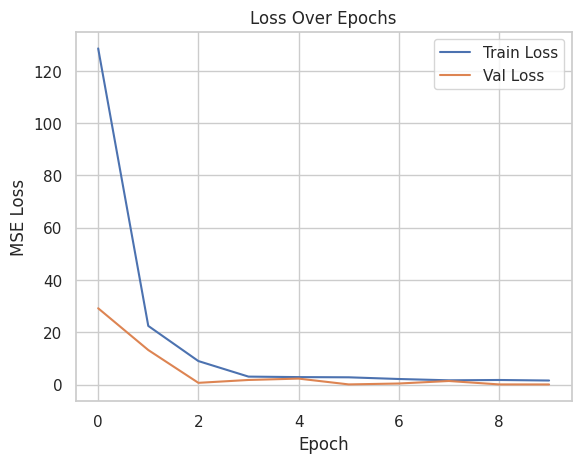

In [98]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Concatenate

# üëâ B∆Ø·ªöC 1: ƒê∆Ø·ªúNG D·∫™N
IMAGE_DIR = "/content/drive/MyDrive/dataset_osfstorage-archive/Stimuli/FaceGen/Modeller"
CSV_PATH = "/content/drive/MyDrive/dataset_osfstorage-archive/NormingData/output.csv"

# üëâ B∆Ø·ªöC 2: ƒê·ªåC CSV & CHU·∫®N H√ìA T√äN C·ªòT
df = pd.read_csv(CSV_PATH)
df.columns = df.columns.str.strip()
df.columns = df.columns.str.replace(",", ".", regex=False)

# üëâ B∆Ø·ªöC 3: CH·ªåN C√ÅC C·ªòT ƒê·∫∂C TR∆ØNG
emotion_features = [
    'FearRating', 'AngerRating', 'DisgustRating', 'HappinessRating',
    'SadnessRating', 'SurpriseRating', 'ThreatRating',
    'FearComp', 'AngerComp', 'DisgustComp', 'HappinessComp',
    'SadnessComp', 'SurpriseComp', 'ThreatComp'
]

face_features = [
    'Anger', 'Disgust', 'Fear', 'Sad', 'SmileClosed', 'SmileOpen', 'Surprise',
    'BlinkLeft', 'BlinkRIght', 'BrowDownLeft', 'BrowDownRight', 'BrowInLeft',
    'BrownInRight', 'BrowUpLeft', 'BrowUpRight', 'EarsOut', 'EpicanthicFold',
    'EyeSquintLeft', 'EyeSquintRight', 'LookDown', 'LookLeft', 'LookRight',
    'LookUp', 'aah', 'B,M,P', 'big aah', 'ch,J,sh', 'D,S,T', 'ee', 'eh', 'F,V',
    'i', 'K', 'N', 'oh', 'ooh,Q', 'R', 'th', 'W'
]

# L·ªçc ch·ªâ gi·ªØ c·ªôt c√≥ trong CSV
face_features = [col for col in face_features if col in df.columns]
df = df.dropna(subset=['ImageFile', 'PainRating'] + emotion_features + face_features)

# üëâ B∆Ø·ªöC 4: LOAD ·∫¢NH & TR√çCH FEATURES
X_img, X_emotion, X_face, y, img_folder_names = [], [], [], [], []

for root, dirs, files in os.walk(IMAGE_DIR):
    for file in files:
        if file.endswith('.jpg') or file.endswith('.png'):
            img_path = os.path.join(root, file)
            img_name = file

            if "_" in img_name:
                image_file_part = img_name.split("_")[-1]

                label_row = df[df['ImageFile'] == image_file_part]
                if not label_row.empty:
                    try:
                        img = load_img(img_path, target_size=(128, 128))
                        img_array = img_to_array(img) / 255.0

                        emotion_data = label_row[emotion_features].values[0]
                        face_data = label_row[face_features].values[0]
                        pain = label_row['PainRating'].values[0]

                        X_img.append(img_array)
                        X_emotion.append(emotion_data)
                        X_face.append(face_data)
                        y.append(pain)

                        folder_name = os.path.basename(os.path.dirname(img_path))
                        img_folder_names.append(folder_name)

                    except Exception as e:
                        print(f"‚ùå L·ªói x·ª≠ l√Ω ·∫£nh {file}: {e}")

X_img = np.array(X_img)
X_emotion = np.array(X_emotion)
X_face = np.array(X_face)
y = np.array(y)
img_folder_names = np.array(img_folder_names)

print("‚úÖ T·ªïng ·∫£nh h·ª£p l·ªá:", len(X_img))

# üëâ B∆Ø·ªöC 5: CHIA THEO FOLDER
all_folders = sorted(list(set(img_folder_names)))
train_folders, temp_folders = train_test_split(all_folders, test_size=0.3, random_state=42)
val_folders, test_folders = train_test_split(temp_folders, test_size=0.5, random_state=42)

X_img_train, X_emo_train, X_face_train, y_train = [], [], [], []
X_img_val, X_emo_val, X_face_val, y_val = [], [], [], []
X_img_test, X_emo_test, X_face_test, y_test = [], [], [], []

for i, folder_name in enumerate(img_folder_names):
    if folder_name in train_folders:
        X_img_train.append(X_img[i])
        X_emo_train.append(X_emotion[i])
        X_face_train.append(X_face[i])
        y_train.append(y[i])
    elif folder_name in val_folders:
        X_img_val.append(X_img[i])
        X_emo_val.append(X_emotion[i])
        X_face_val.append(X_face[i])
        y_val.append(y[i])
    elif folder_name in test_folders:
        X_img_test.append(X_img[i])
        X_emo_test.append(X_emotion[i])
        X_face_test.append(X_face[i])
        y_test.append(y[i])

X_img_train, X_emo_train, X_face_train, y_train = map(np.array, [X_img_train, X_emo_train, X_face_train, y_train])
X_img_val, X_emo_val, X_face_val, y_val = map(np.array, [X_img_val, X_emo_val, X_face_val, y_val])
X_img_test, X_emo_test, X_face_test, y_test = map(np.array, [X_img_test, X_emo_test, X_face_test, y_test])

print("‚úÖ Train:", len(X_img_train), "| Val:", len(X_img_val), "| Test:", len(X_img_test))

# üëâ B∆Ø·ªöC 6: M√î H√åNH MULTIMODAL
img_input = Input(shape=(128, 128, 3))
x = Conv2D(32, (3,3), activation='relu')(img_input)
x = MaxPooling2D((2,2))(x)
x = Conv2D(64, (3,3), activation='relu')(x)
x = MaxPooling2D((2,2))(x)
x = Flatten()(x)

emotion_input = Input(shape=(len(emotion_features),))
e = Dense(32, activation='relu')(emotion_input)

face_input = Input(shape=(len(face_features),))
f = Dense(32, activation='relu')(face_input)

combined = Concatenate()([x, e, f])
z = Dense(128, activation='relu')(combined)
z = Dropout(0.3)(z)
output = Dense(1)(z)

model = Model(inputs=[img_input, emotion_input, face_input], outputs=output)
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

# üëâ B∆Ø·ªöC 7: TRAIN
history = model.fit(
    [X_img_train, X_emo_train, X_face_train], y_train,
    validation_data=([X_img_val, X_emo_val, X_face_val], y_val),
    epochs=10,
    batch_size=16
)

# üëâ B∆Ø·ªöC 8: EVALUATE
loss, mae = model.evaluate([X_img_test, X_emo_test, X_face_test], y_test)
print(f"\nüéØ Test MAE: {mae:.2f}")

# üëâ B∆Ø·ªöC 9: V·∫º LOSS
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.show()


1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 52ms/step


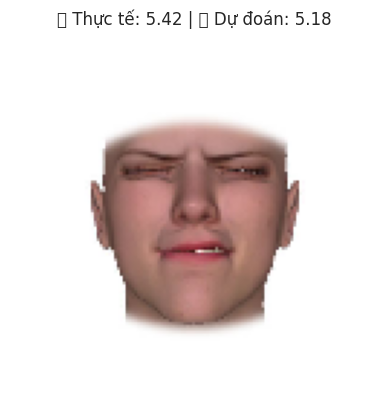

In [100]:
# üëâ L·∫•y 1 m·∫´u ·∫£nh t·ª´ t·∫≠p test ƒë·ªÉ th·ª≠ nghi·ªám
idx = 0  # ho·∫∑c ch·ªçn ng·∫´u nhi√™n: random.randint(0, len(X_img_test)-1)

img_sample = np.expand_dims(X_img_test[idx], axis=0)
emo_sample = np.expand_dims(X_emo_test[idx], axis=0)
face_sample = np.expand_dims(X_face_test[idx], axis=0)

# üëâ D·ª± ƒëo√°n
pred = model.predict([img_sample, emo_sample, face_sample])[0][0]

# üëâ Hi·ªÉn th·ªã k·∫øt qu·∫£
plt.imshow(X_img_test[idx])
plt.axis('off')
plt.title(f"üéØ Th·ª±c t·∫ø: {y_test[idx]:.2f} | ü§ñ D·ª± ƒëo√°n: {pred:.2f}")
plt.show()


1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 143ms/step


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129302 (\N{ROBOT FACE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


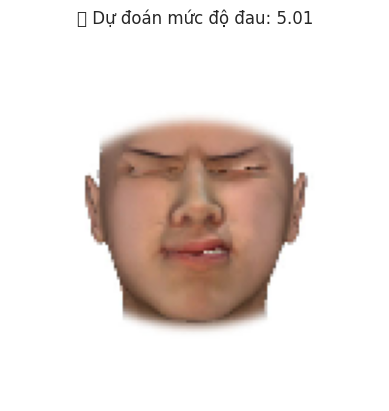

In [92]:
# üëâ ƒê∆∞·ªùng d·∫´n ·∫£nh test m·ªõi
img_path = "/content/drive/MyDrive/dataset_osfstorage-archive/Stimuli/FaceGen/Modeller/AF1/AF1_PMS7.jpg"
image_file_part = "EF5.jpg"  # Ph·∫ßn t√™n file kh·ªõp trong c·ªôt 'ImageFile' c·ªßa CSV

# üëâ T√¨m d√≤ng t∆∞∆°ng ·ª©ng trong DataFrame
row = df[df['ImageFile'] == image_file_part]
if row.empty:
    print("‚ùå Kh√¥ng t√¨m th·∫•y th√¥ng tin t∆∞∆°ng ·ª©ng trong file CSV.")
else:
    # üëâ Ti·ªÅn x·ª≠ l√Ω ·∫£nh
    img = load_img(img_path, target_size=(128, 128))
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # üëâ Tr√≠ch xu·∫•t ƒë·∫∑c tr∆∞ng c·∫£m x√∫c v√† khu√¥n m·∫∑t
    emotion_input_sample = np.expand_dims(row[emotion_features].values[0], axis=0)
    face_input_sample = np.expand_dims(row[face_features].values[0], axis=0)

    # üëâ D·ª± ƒëo√°n
    predicted_pain = model.predict([img_array, emotion_input_sample, face_input_sample])[0][0]

    # üëâ Hi·ªÉn th·ªã k·∫øt qu·∫£
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"ü§ñ D·ª± ƒëo√°n m·ª©c ƒë·ªô ƒëau: {predicted_pain:.2f}")
    plt.show()



In [90]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# üëâ ƒê∆∞·ªùng d·∫´n ·∫£nh test
img_path = "/content/drive/MyDrive/dataset_osfstorage-archive/Stimuli/FaceGen/Modeller/AF1/AF1.jpg"

# üëâ T√°ch h·∫≠u t·ªë ƒë·ªÉ t√¨m d√≤ng trong CSV
filename = os.path.basename(img_path)            # "AF1_EF5.jpg"
suffix = filename.split('_')[-1]                 # "EF5.jpg"

# üëâ T√¨m d√≤ng kh·ªõp trong CSV
row = df[df['ImageFile'] == suffix]

if row.empty:
    print(f"‚ùå Kh√¥ng t√¨m th·∫•y d√≤ng n√†o c√≥ ImageFile = '{suffix}' trong CSV.")
else:
    row = row.iloc[0]

    # üëâ Ti·ªÅn x·ª≠ l√Ω ·∫£nh
    img = load_img(img_path, target_size=(128, 128))
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # üëâ Tr√≠ch xu·∫•t ƒë·∫∑c tr∆∞ng
    emotion_input_sample = np.expand_dims(row[emotion_features].values.astype(float), axis=0)
    face_input_sample = np.expand_dims(row[face_features].values.astype(float), axis=0)

    # üëâ D·ª± ƒëo√°n
    predicted_pain = model.predict([img_array, emotion_input_sample, face_input_sample])[0][0]

    # üëâ Hi·ªÉn th·ªã k·∫øt qu·∫£
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"ü§ñ D·ª± ƒëo√°n m·ª©c ƒë·ªô ƒëau: {predicted_pain:.2f}")
    plt.show()


‚ùå Kh√¥ng t√¨m th·∫•y d√≤ng n√†o c√≥ ImageFile = 'AF1.jpg' trong CSV.
